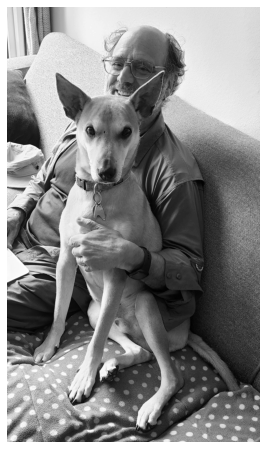

In [20]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]

# target_image = 'dog.jpg'
target_image = 'TakiDog20220824.jpg'

A = imread(os.path.join('..','DATA',target_image))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

The original image may have thousands of rows or columns:

In [22]:
np.shape(X)

(2764, 1604)

#### Singular Value Decomposition

SVD decomposes any (typically non-square) data matrix $X$ into two unitary matrices and a diagonal matrix:

$$U, S, V^T = svd(X)$$

such that

$$X = U S V^T$$

If $X$ is n x m, then
    - $U$ is n x n matrix whose columns are "left-singular vectors" (but only the first m columns have useful information, since there are only m columns in the original $X$)
    - $S$ is n x m _diagonal_ matrix, but only the first m rows are non-zero, and of course all the off-diagonal elements of $S$ are zero. The diagonl elements of $S$ "singular values"
    - $V^T$ is a m x m matrix of "right-singular vectors"

With the important properties that:

1. $U$ and $V^T$ are unitary, i.e. 
    - $U U^T = I = U^T U$
    - $V^T V = I = V V^T$
2. The singular vectors contain a basis spanning the same space as the original data $X$, and are ordered in terms of their importance for representing the data in $X$
    - XXXX


In [23]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)


In [25]:
np.shape(U), np.shape(S), np.shape(VT)

((2764, 1604), (1604, 1604), (1604, 1604))

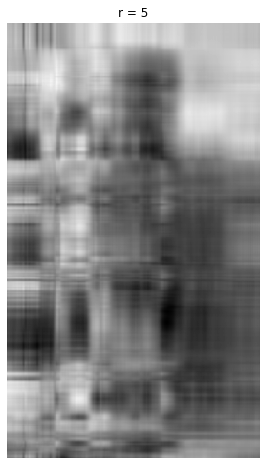

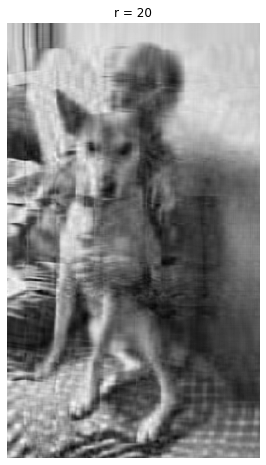

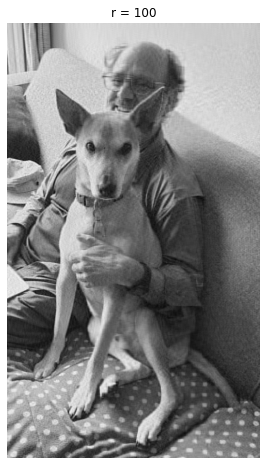

In [29]:

j = 0
for r in (5, 20, 100):
    # Construct approximate image of Rank r, for various values
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

#### Importance (information or energy content) of the Singular Vectors is Given by $S$
The diagonal matrix $S$ of singular values provides a measure of the importance of the singular vectors in $U$ (or in $VT$).

We can plot their importance, and see how it falls off quickly (note the logarithmic vertical scale).
It is very convenient that the singular values in $S$ and the singular vectors in $U$ are ordered in terms of their importance.

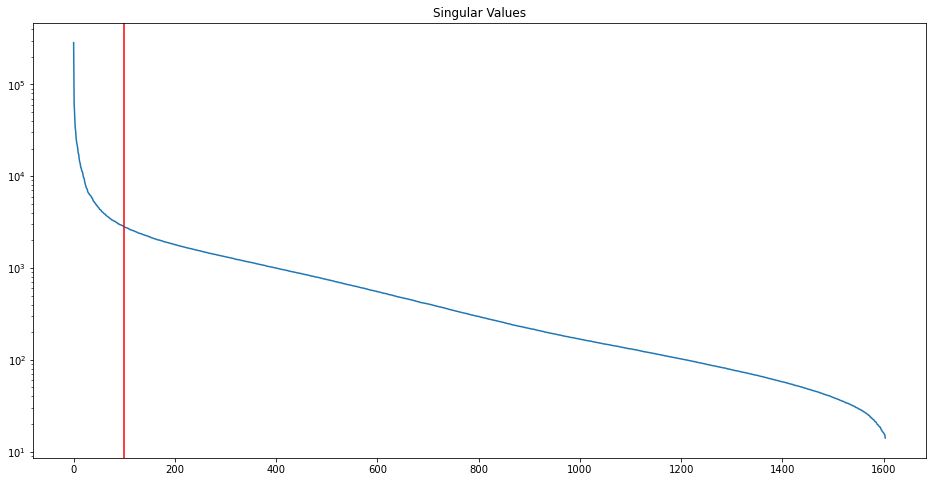

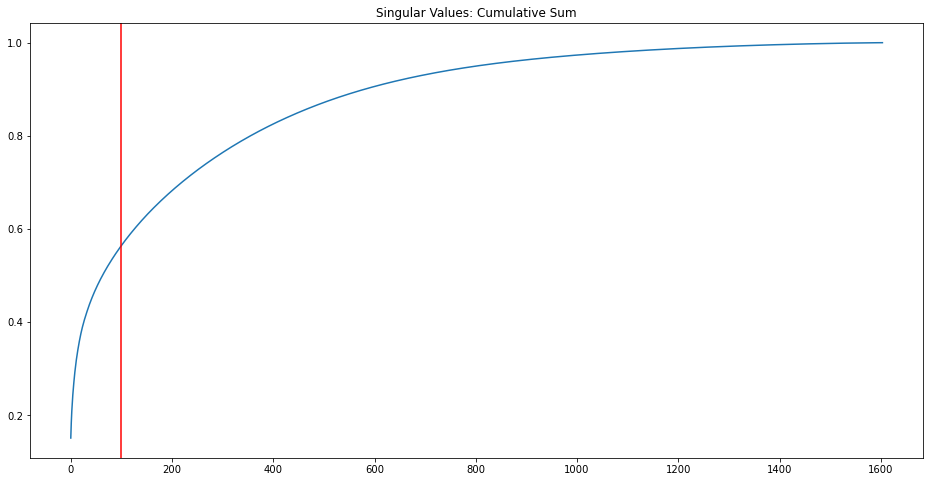

In [32]:
## f_ch01_ex02_2

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.axvline(x = 100, color = "red")
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.axvline(x = 100, color = "red")
plt.show()